# Appendix: Optimize Hyperparameters for Different Methods

In [130]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from experiments import run_experiment, KNNImputer, MICEImputer
from rich.progress import track

This notebook is used to explore how different hyperparameters work for different imputation algorithms.

# Determine hyperparameter n for KNN

We need to select the number of nearest neighbours to use for KNN.

In [112]:
num_sites = 3
gap_length = 90
dataset = 'dataset.csv'
ns = [2,3,5,7,9,11,13,15,17,19,21]

results_list = []
filtered_results = []
for n in track(ns):
    for i in range(30):
        result = run_experiment(KNNImputer(n_neighbors=n), 
                            minimum_missing_data=90, 
                            num_sites=num_sites, 
                            gap_length=gap_length,
                            rerun_experiment=True,
                            dataset=dataset, random_seed=None)
        results_list.append(result)
            
        filtered_result = {k: v for k, v in result.items() if isinstance(v, (int, float, str))}
        filtered_result['n'] = n
        filtered_results.append(filtered_result)

filtered_results = pd.DataFrame(filtered_results)

Output()

In [116]:
averaged_results = filtered_results[['n', 'RMSE', 'MAE']].groupby('n').agg({
    'MAE': ['mean', 'std'], 'RMSE': ['mean', 'std']}).reset_index()

rmse_mean = averaged_results[('RMSE', 'mean')]
rmse_std  = averaged_results[('RMSE', 'std')]
mae_mean  = averaged_results[('MAE', 'mean')]
mae_std   = averaged_results[('MAE', 'std')]

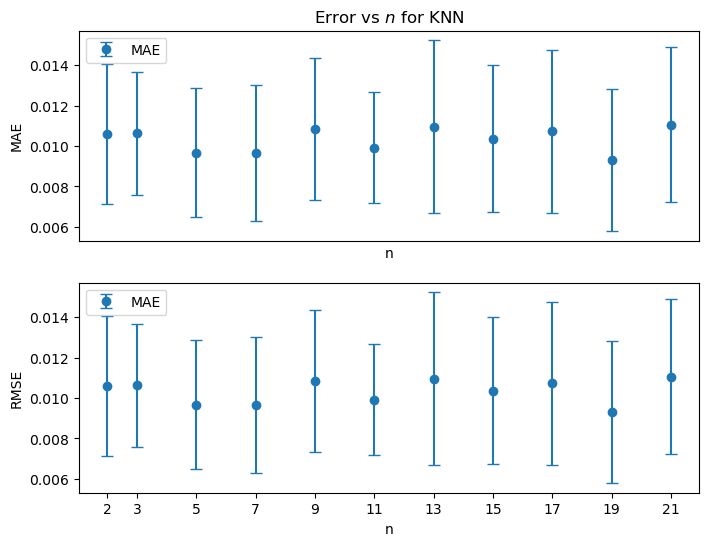

In [115]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].errorbar(ns, mae_mean, yerr=mae_std, fmt='o', capsize=4, label='MAE')
ax[0].set_title('MAE vs n with Error Bars')
ax[0].set_xlabel('n')
ax[0].set_ylabel('MAE')
ax[0].legend()

ax[1].errorbar(ns, mae_mean, yerr=mae_std, fmt='o', capsize=4, label='MAE')
ax[1].set_xlabel('n')
ax[1].set_ylabel('RMSE')
ax[1].legend()

ax[0].set_title(f'Error vs $n$ for KNN')
ax[0].set_xticks([])
ax[1].set_xticks(ns)
plt.show()

There is no clear trend to indicate a "best" value for $n$ when using KNN for the the Shelburne County Dataset (for the experiment of randomly introducing artificial 90-day gaps into three of the time series in the set.)

In analyses of other datasets as long as $n>=3$ then KNN appears to give similar results.  We choose $n=7$ as the default for the number of neighbors in KNN.

# Determine hyperparameter k_pmm for MICE

In [125]:
num_sites = 3
gap_length = 90
dataset = 'dataset.csv'
k_pmms = [2,3,5,7,9,11]

results_list = []
filtered_results = []
for k_pmm in track(k_pmms):
    for i in range(3):
        result = run_experiment(MICEImputer(k_pmm), 
                                minimum_missing_data=90, 
                                num_sites=num_sites, 
                                gap_length=gap_length,
                                rerun_experiment=True,
                                dataset=dataset, random_seed=None)
        results_list.append(result)
                
        filtered_result = {k: v for k, v in result.items() if isinstance(v, (int, float, str))}
        filtered_result['k_pmm'] = k_pmm
        filtered_results.append(filtered_result)

filtered_results = pd.DataFrame(filtered_results)

Output()

In [126]:
averaged_results = filtered_results[['k_pmm', 'RMSE', 'MAE']].groupby('k_pmm').agg({
    'MAE': ['mean', 'std'], 'RMSE': ['mean', 'std']}).reset_index()

rmse_mean = averaged_results[('RMSE', 'mean')]
rmse_std  = averaged_results[('RMSE', 'std')]
mae_mean  = averaged_results[('MAE', 'mean')]
mae_std   = averaged_results[('MAE', 'std')]

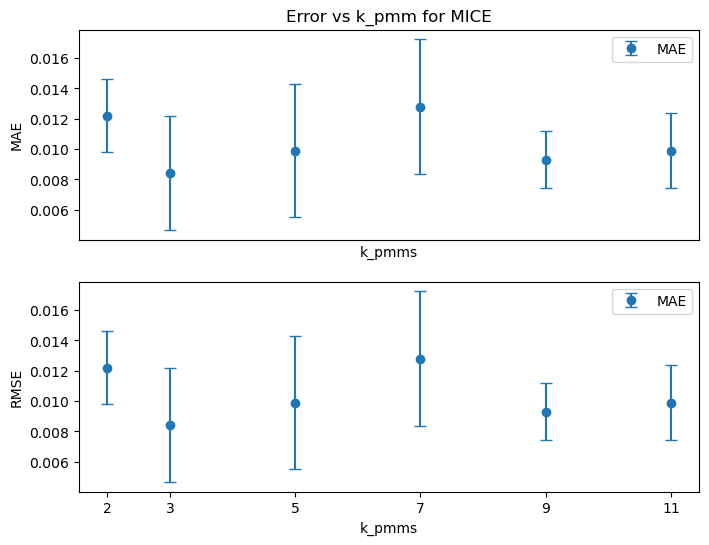

In [129]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].errorbar(k_pmms, mae_mean, yerr=mae_std, fmt='o', capsize=4, label='MAE')
ax[0].set_xlabel('k_pmms')
ax[0].set_ylabel('MAE')
ax[0].legend()

ax[1].errorbar(k_pmms, mae_mean, yerr=mae_std, fmt='o', capsize=4, label='MAE')
ax[1].set_xlabel('k_pmms')
ax[1].set_ylabel('RMSE')
ax[1].legend()

ax[0].set_title(f'Error vs k_pmm for MICE')
ax[0].set_xticks([])
ax[1].set_xticks(k_pmms)
plt.show()

Choose `k_pmm = 3` as the default for MICE.